# DDoS Attack Detection using Classification Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('DDOS.csv')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11624\1749795430.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('DDOS.csv')


In [3]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
3,35641,172.16.0.5-192.168.50.1-62504-28295-17,172.16.0.5,62504,192.168.50.1,28295,17,2018-12-01 13:40:25.825426,6010191,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
4,175243,172.16.0.5-192.168.50.1-22126-22126-6,172.16.0.5,22126,192.168.50.1,22126,6,2018-12-01 13:34:32.812922,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP


# Dataset analysis

In [4]:
df.isnull().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201079 entries, 0 to 201078
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    201079 non-null  int64  
 1   Flow ID                       201079 non-null  object 
 2    Source IP                    201079 non-null  object 
 3    Source Port                  201079 non-null  int64  
 4    Destination IP               201079 non-null  object 
 5    Destination Port             201079 non-null  int64  
 6    Protocol                     201079 non-null  int64  
 7    Timestamp                    201079 non-null  object 
 8    Flow Duration                201079 non-null  int64  
 9    Total Fwd Packets            201079 non-null  int64  
 10   Total Backward Packets       201079 non-null  int64  
 11  Total Length of Fwd Packets   201079 non-null  float64
 12   Total Length of Bwd Packets  201079 non-nul

In [6]:
df.shape

(201079, 88)

In [7]:
df['Flow ID'].unique()

array(['172.16.0.5-192.168.50.1-44669-27661-17',
       '172.16.0.5-192.168.50.1-26607-47973-6',
       '172.16.0.5-192.168.50.1-62744-29235-17', ...,
       '172.16.0.5-192.168.50.1-62492-10553-17',
       '172.16.0.5-192.168.50.1-41987-42708-17',
       '172.16.0.5-192.168.50.1-50129-28870-17'], dtype=object)

In [8]:
df[' Label'].unique()

array(['TFTP', 'BENIGN'], dtype=object)

In [9]:
df[' Inbound'].unique()

array([1, 0], dtype=int64)

In [10]:
df[' Label'].value_counts()

TFTP      200804
BENIGN       275
Name:  Label, dtype: int64

In [11]:
df[' Inbound'].value_counts()

1    200807
0       272
Name:  Inbound, dtype: int64

# Data preprocessing

In [12]:
df[' Label']=df[' Label'].replace('TFTP',1)
df[' Label']=df[' Label'].replace('BENIGN',0)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,35641,172.16.0.5-192.168.50.1-62504-28295-17,172.16.0.5,62504,192.168.50.1,28295,17,2018-12-01 13:40:25.825426,6010191,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,175243,172.16.0.5-192.168.50.1-22126-22126-6,172.16.0.5,22126,192.168.50.1,22126,6,2018-12-01 13:34:32.812922,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [13]:
df[' Label'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

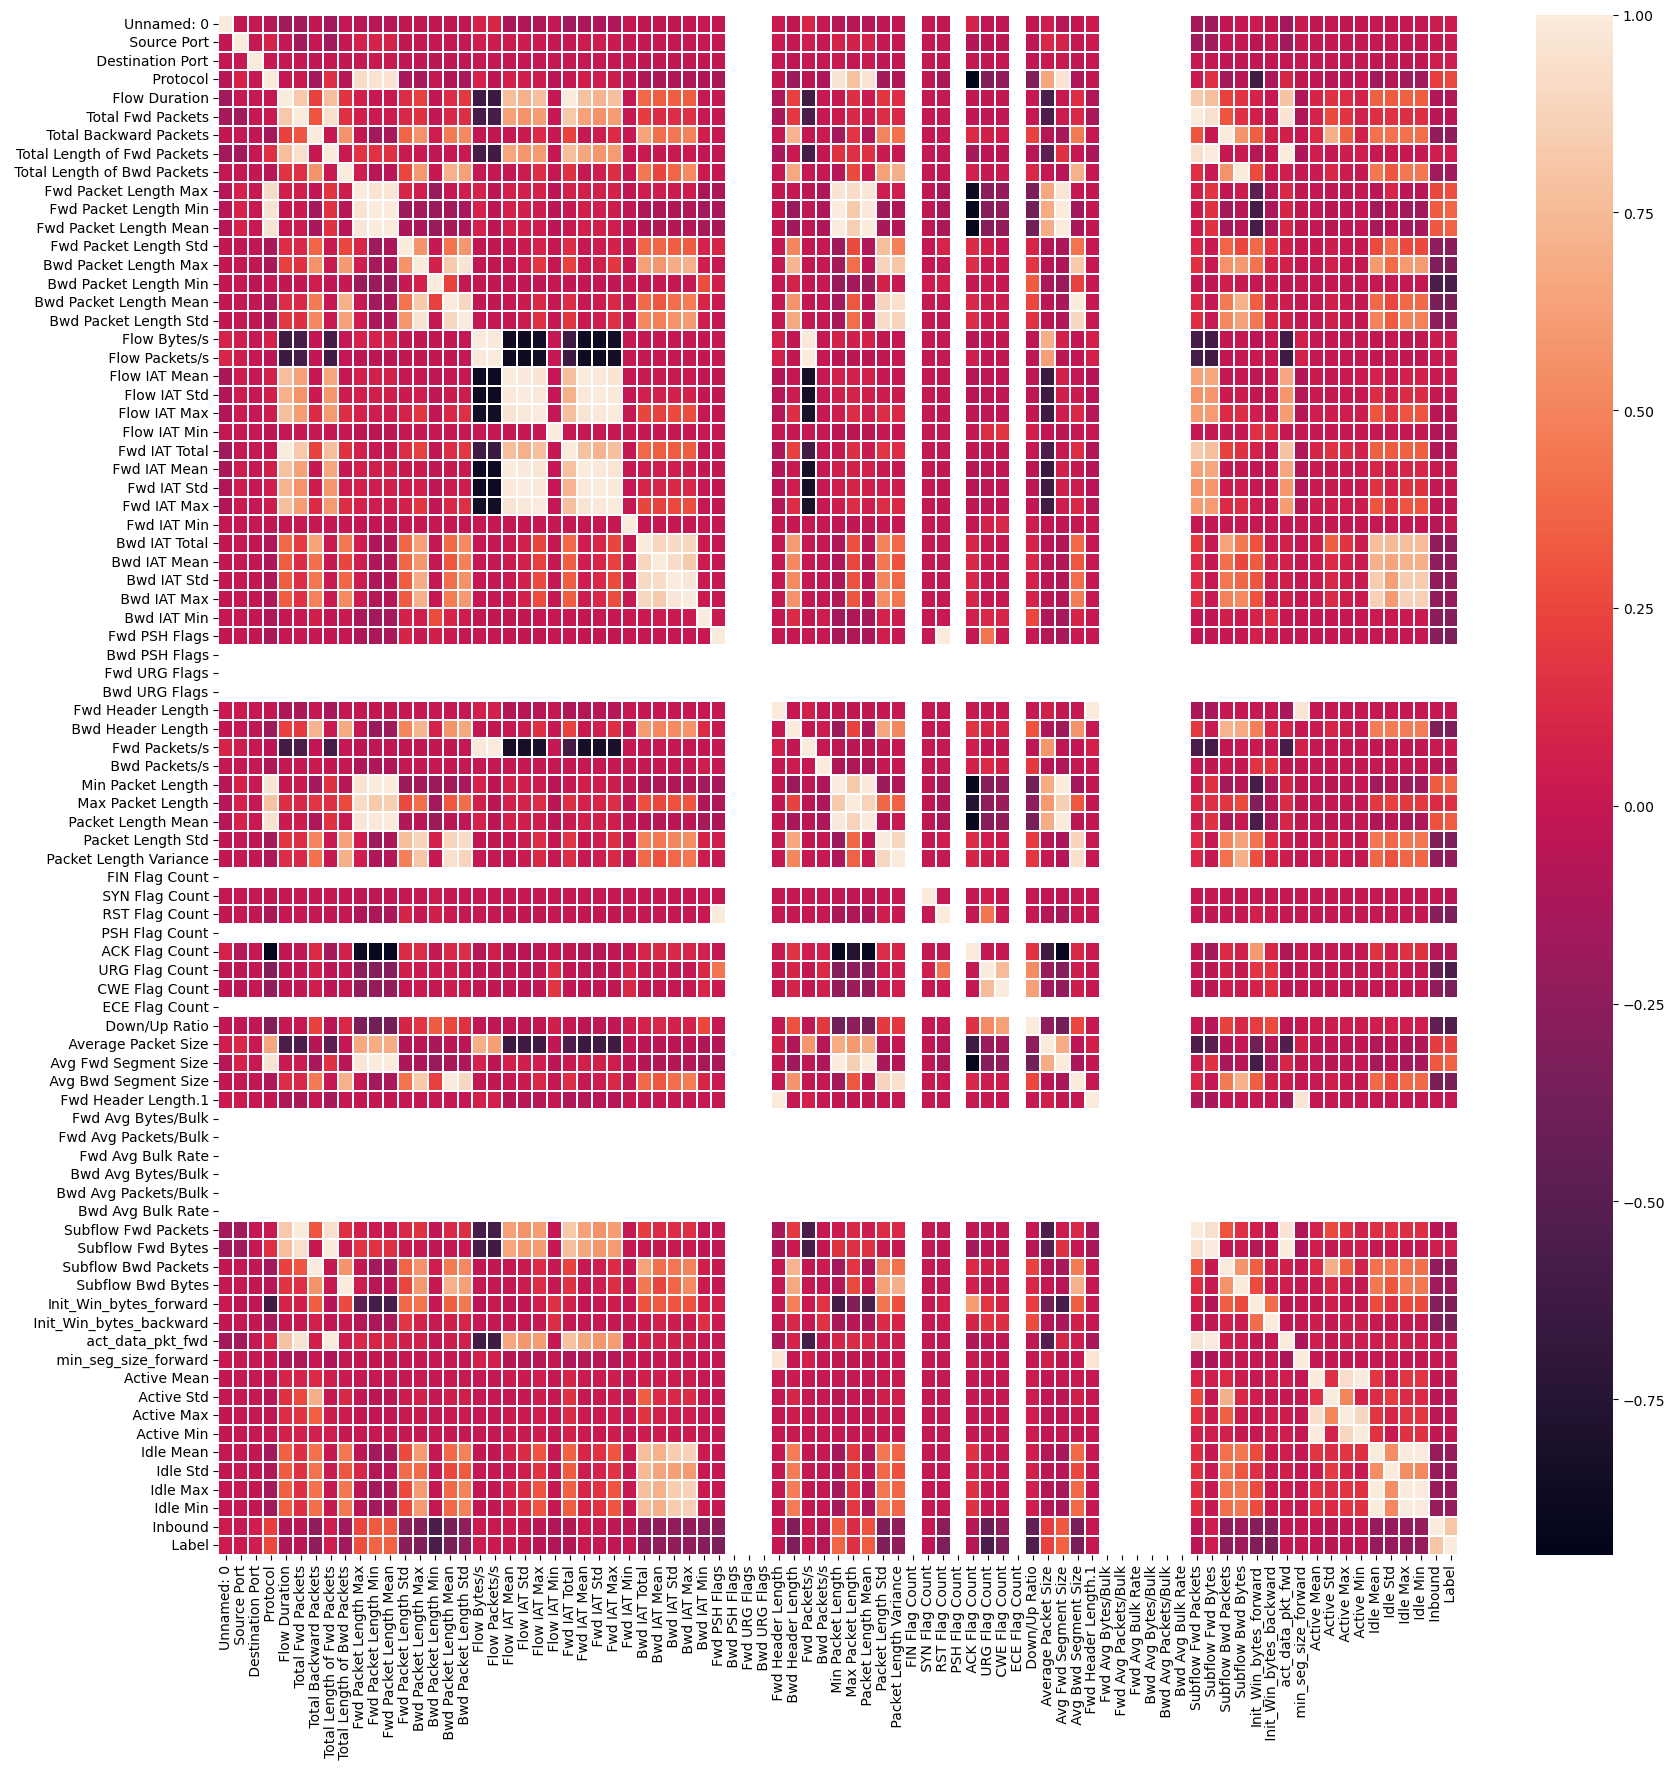

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df.corr(),linewidths=0.3)

In [15]:
df.drop(['Bwd Packet Length Max',' URG Flag Count',' Down/Up Ratio'], inplace=True, axis=1) 

In [16]:
df.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,172.16.0.5-192.168.50.1-44669-27661-17,172.16.0.5,44669,192.168.50.1,27661,17,2018-12-01 13:41:11.669699,3006788,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,111158,172.16.0.5-192.168.50.1-26607-47973-6,172.16.0.5,26607,192.168.50.1,47973,6,2018-12-01 13:34:35.248008,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,50970,172.16.0.5-192.168.50.1-62744-29235-17,172.16.0.5,62744,192.168.50.1,29235,17,2018-12-01 13:40:34.055555,6001231,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [17]:
#importing label-encoder
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

In [18]:
df.select_dtypes(include=['object']).columns.tolist()

['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP']

In [19]:
#converting the datatype of the columns(object->int) through labelencoding
df['Flow ID']=le.fit_transform(df['Flow ID'])
df[' Source IP']=le.fit_transform(df[' Source IP'])
df[' Destination IP']=le.fit_transform(df[' Destination IP'])
df[' Timestamp']=le.fit_transform(df[' Timestamp'])

In [20]:
df['SimillarHTTP'].unique()
#converting the datatype of the column 1st to a string, then to int through labelencoding
df['SimillarHTTP'] = df['SimillarHTTP'].astype(str)
df['SimillarHTTP']=le.fit_transform(df['SimillarHTTP'])

In [21]:
df.select_dtypes(include=['float64']).columns.tolist()

['Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 'Active Mean',
 ' Active Std',
 ' Active Max',
 ' Active Min',
 'Idle Mean',
 ' Idle Std',
 ' Idle Max',
 ' Idle Min']

In [22]:
#converting the datatype of the columns(float->int)
df['Total Length of Fwd Packets'] = df['Total Length of Fwd Packets'].astype(int)
df[' Fwd Packet Length Max'] = df[' Fwd Packet Length Max'].astype(int)
df[' Fwd Packet Length Min'] = df[' Fwd Packet Length Min'].astype(int)
df[' Fwd Packet Length Mean'] = df[' Fwd Packet Length Mean'].astype(int)
df[' Flow IAT Mean'] = df[' Flow IAT Mean'].astype(int)
df[' Flow IAT Std'] = df[' Flow IAT Std'].astype(int)
df[' Flow IAT Max'] = df[' Flow IAT Max'].astype(int)
df[' Flow IAT Min'] = df[' Flow IAT Min'].astype(int)
df['Fwd IAT Total'] = df['Fwd IAT Total'].astype(int)
df[' Fwd IAT Mean'] = df[' Fwd IAT Mean'].astype(int)
df[' Fwd IAT Std'] = df[' Flow IAT Std'].astype(int)
df[' Fwd IAT Max'] = df[' Fwd IAT Max'].astype(int)
df[' Fwd IAT Min'] = df[' Fwd IAT Min'].astype(int)
df['Fwd Packets/s'] = df['Fwd Packets/s'].astype(int)
df[' Bwd Packets/s'] = df[' Bwd Packets/s'].astype(int)
df[' Min Packet Length'] = df[' Min Packet Length'].astype(int)
df[' Max Packet Length'] = df[' Max Packet Length'].astype(int)
df[' Packet Length Mean'] = df[' Packet Length Mean'].astype(int)
df[' Average Packet Size'] = df[' Average Packet Size'].astype(int)
df[' Avg Fwd Segment Size'] = df[' Avg Fwd Segment Size'].astype(int)
df['Active Mean'] = df['Active Mean'].astype(int)
df[' Active Std'] = df[' Active Std'].astype(int)
df[' Active Max'] = df[' Active Max'].astype(int)
df[' Active Min'] = df[' Active Min'].astype(int)
df['Flow Bytes/s'] = df['Flow Bytes/s'].apply("int64")
df[' Flow Packets/s'] = df[' Flow Packets/s'].apply("int64")

C:\Anaconda\lib\site-packages\pandas\core\series.py:872: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype)


In [23]:
df.select_dtypes(include=['float64']).columns.tolist()

[' Total Length of Bwd Packets',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Avg Bwd Segment Size',
 'Idle Mean',
 ' Idle Std',
 ' Idle Max',
 ' Idle Min']

In [24]:
df[' Total Length of Bwd Packets'] = df[' Total Length of Bwd Packets'].astype(int)
df[' Fwd Packet Length Std'] = df[' Fwd Packet Length Std'].astype(int)
df[' Bwd Packet Length Std'] = df[' Bwd Packet Length Std'].astype(int)
df[' Bwd Packet Length Min'] = df[' Bwd Packet Length Min'].astype(int)
df[' Bwd Packet Length Mean'] = df[' Bwd Packet Length Mean'].astype(int)
df['Bwd IAT Total'] = df['Bwd IAT Total'].astype(int)
df[' Bwd IAT Mean'] = df[' Bwd IAT Mean'].astype(int)
df[' Bwd IAT Std'] = df[' Bwd IAT Std'].astype(int)
df[' Bwd IAT Max'] = df[' Bwd IAT Max'].astype(int)
df[' Bwd IAT Min'] = df[' Bwd IAT Min'].astype(int)
df[' Packet Length Std'] = df[' Packet Length Std'].astype(int)
df[' Packet Length Variance'] = df[' Packet Length Variance'].astype(int)
df[' Avg Bwd Segment Size'] = df[' Avg Bwd Segment Size'].astype(int)
df['Idle Mean'] = df['Idle Mean'].astype(int)
df[' Idle Std'] = df[' Idle Std'].astype(int)
df[' Idle Max'] = df[' Idle Max'].astype(int)
df[' Idle Min'] = df[' Idle Min'].astype(int)

In [25]:
df.select_dtypes(include=['float64']).columns.tolist()

[]

In [26]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,36815,26341,2,44669,34,27661,17,9886,3006788,4,...,0,0,0,0,0,0,0,0,1,1
1,111158,13342,2,26607,34,47973,6,830,1,2,...,0,0,0,0,0,0,0,0,1,1
2,50970,147095,2,62744,34,29235,17,5699,6001231,6,...,0,0,0,0,0,0,0,0,1,1
3,35641,93053,2,62504,34,28295,17,5027,6010191,6,...,0,0,0,0,0,0,0,0,1,1
4,175243,10008,2,22126,34,22126,6,567,1,2,...,0,0,0,0,0,0,0,0,1,1


In [27]:
# assigning dependent and independent variable
x=df.drop(labels=[' Label'],axis=1)
y=df[' Label']

In [28]:
x.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
0,36815,26341,2,44669,34,27661,17,9886,3006788,4,...,0,0,0,0,0,0,0,0,0,1
1,111158,13342,2,26607,34,47973,6,830,1,2,...,0,0,0,0,0,0,0,0,0,1
2,50970,147095,2,62744,34,29235,17,5699,6001231,6,...,0,0,0,0,0,0,0,0,0,1
3,35641,93053,2,62504,34,28295,17,5027,6010191,6,...,0,0,0,0,0,0,0,0,0,1
4,175243,10008,2,22126,34,22126,6,567,1,2,...,0,0,0,0,0,0,0,0,0,1


 # Model Training & Testing

In [29]:
#splitting dataset into training & testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)
x_train.shape,x_test.shape

((140755, 84), (60324, 84))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [32]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(30)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
        
    model_scores=pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores=model_scores.sort_values('Score')    
    return model_scores

In [33]:
models={'KNeighborsClassifier': KNeighborsClassifier(),
        'SVC': SVC(),
        'Naive-Bayes': GaussianNB(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'XGBoost Classifier': XGBClassifier(),
        'XGBRFClassifier': XGBRFClassifier()
       }

In [34]:
all_model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
#baseline_model_score
all_model_scores.sort_values('Score')

,Score
Naive-Bayes,0.991678
KNeighborsClassifier,0.999901
SVC,0.999950
DecisionTreeClassifier,0.999967
AdaBoostClassifier,0.999967
GradientBoostingClassifier,0.999983
RandomForestClassifier,1.000000
XGBoost Classifier,1.000000
XGBRFClassifier,1.000000


Text(0.5, 1.0, 'Baseline Model Precision Score')

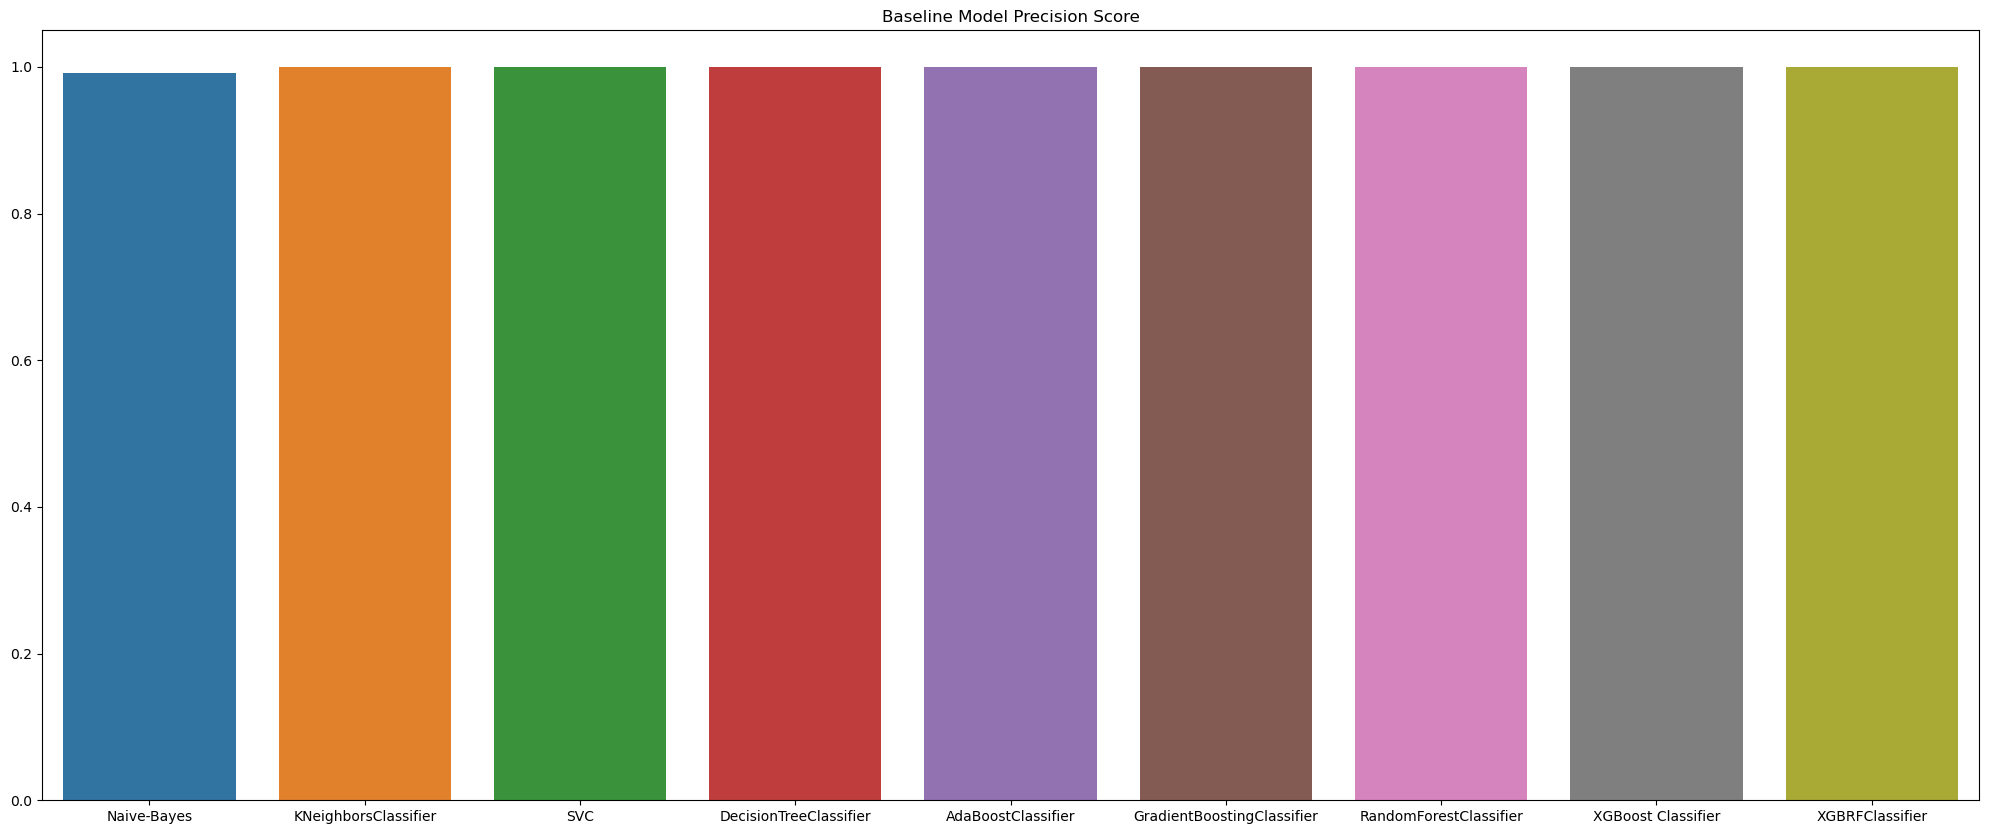

In [36]:
plt.figure(figsize=(25,10))
sb.barplot(data=all_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')

# Model Evaluation

In [37]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [38]:
train_acc=model.predict(x_train)
nb_train=accuracy_score(train_acc,y_train)
print(nb_train)

0.9912329934993428


In [39]:
test_acc=model.predict(x_test)
nb_test=accuracy_score(test_acc,y_test)
print(nb_test)

0.9916782706717061


In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

In [41]:
model=model.fit(x_train,y_train)
scores=cross_val_score(model, x_train, y_train, scoring='r2', cv=58)
scores

array([-6.67615512, -9.01237624, -7.34364686, -5.67491749, -4.67367987,
       -5.00742574, -2.00371287, -8.01113861, -9.01237624, -3.33869637,
       -7.67739274, -6.00866337, -8.01113861, -6.67615512, -9.01237624,
       -3.2570161 , -4.00825423, -4.50907965, -3.75784152, -3.2570161 ,
       -4.00825423, -5.5107305 ,  0.49917458, -3.50742881, -2.50577796,
       -5.76114321, -4.00825423, -3.2570161 , -4.25866694, -4.50907965,
       -4.50907965, -3.75784152, -3.50742881, -4.75949236, -5.00990508,
       -3.00660338, -3.00660338, -2.25536525, -3.50742881, -2.75619067,
       -5.5107305 , -4.25866694, -4.75949236, -4.00825423, -6.76279406,
       -4.50907965, -4.25866694, -8.01114321, -6.34241299, -8.34488926,
       -5.34117485, -5.6749209 , -6.67615903, -5.6749209 , -5.00742881,
       -5.6749209 , -5.6749209 , -7.00990508])

In [42]:
print("Train-", np.mean(scores))

Train- -5.0574595956507435


In [43]:
predict_score=cross_val_predict(model,x_test,y_test)
predict_score

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
score_test=cross_val_score(model,x_test,y_test,cv=58)
score_test

array([1.        , 1.        , 0.99903939, 1.        , 1.        ,
       1.        , 0.99903846, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99903846, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99903846, 1.        , 1.        , 0.99903846,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99903846,
       1.        , 0.99903846, 0.99807692, 1.        , 0.99903846,
       1.        , 1.        , 1.        , 0.99903846, 1.        ,
       1.        , 1.        , 0.99903846, 0.99903846, 0.99903846,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [45]:
print("Test-", np.mean(score_test))

Test- 0.9997679204345953


>1, train: 0.991, test: 0.992
>2, train: 0.991, test: 0.992
>3, train: 0.991, test: 0.992
>4, train: 0.991, test: 0.992


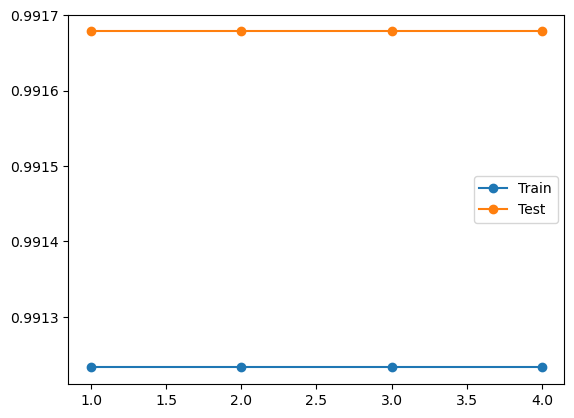

In [46]:
#checking overfit
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]

for i in values:
 train_scores.append(nb_train)
 test_scores.append(nb_test)
 print('>%d, train: %.3f, test: %.3f' % (i, nb_train, nb_test))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [52]:
score = f1_score(y_test, test_acc, average="macro")
print("Macro F1-Score: ", score)
score2 = f1_score(y_test, test_acc, average="micro")
print("Micro F1-Score: ", score2)
score3 = f1_score(y_test, test_acc, average="weighted")
print("Weighted F1-Score: ", score3)

Macro F1-Score:  0.6044915797246782
Micro F1-Score:  0.9916782706717061
Weighted F1-Score:  0.994921800904483


In [53]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, test_acc, average='binary')
print('Recall:', recall)

Recall: 0.9916853373164053


# Model Visualization

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_acc))

              precision    recall  f1-score   support

           0       0.12      0.99      0.21        69
           1       1.00      0.99      1.00     60255

    accuracy                           0.99     60324
   macro avg       0.56      0.99      0.60     60324
weighted avg       1.00      0.99      0.99     60324



In [71]:
from sklearn.metrics import precision_score
nb_preci=precision_score(y_test, test_acc)

In [72]:
print("Precision is- ", nb_preci*100, "%")
print("F1 score is- ", score3*100, "%")
print("Recall is- ", recall*100, "%")

Precision is-  99.9983264998745 %
F1 score is-  99.4921800904483 %
Recall is-  99.16853373164052 %


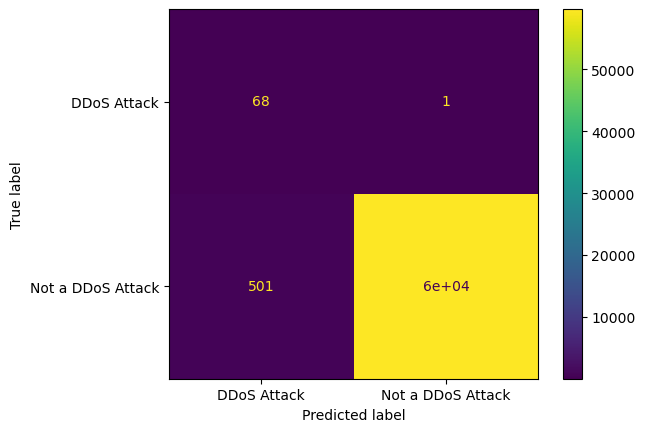

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["DDoS Attack", "Not a DDoS Attack"]
cm = confusion_matrix(y_test, test_acc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#6e+04=60000